# DBOW

## Prepare data

In [1]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [2]:
%cp '/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/Data/data_clean_4_class.pkl' '/content'

In [3]:
import pandas as pd
pd.set_option('max_colwidth', 200)

data = pd.read_pickle('/content/data_clean_4_class.pkl')
# data = data[data['Label'] != 'Undetermined']
data

,Content,Label
0,bắt_cóc trục_xuất đừng chánh_trị_gia giàu hứa nhân_đạo ký thương_ước quốc_gia tôn_trọng nhân_quyền đồng_bào trường_hợp nguyễn_quang hồng nhân trịnh thuý hạnh nhà_nước cộng_hoà liên_bang đức bắt ch...,False
1,dâm tặc viện phó đầu_sai vũ nhôm tràn_ngập báo mạng gọi hình buồn_nôn quyền_thế dâm tặc hưu địa_phương ngang_nhiên trò dâm_ô đồi_bại trẻ_em tưởng_tượng đương_chức trò đồi_bại làm_việc sinh_sống xả...,False
2,kỷ hợi dung_dưỡng tự_chủ dân_tộc v việt_nam chính_thức kỷ hợi âm_lịch việt ngô tiên_vương đánh_đuổi tan giặc nam hán nhà_nước việt_nam độc_lập chủ độc_lập tự_chủ xưng_vương kinh_đô cổ loa phong ch...,False
3,lật chiến thư chỉ_thị nguyễn thị kim_ngân cam_kết vành_đai đường ngân chân_thành bày_tỏ xu_nịnh hoàng_đế tập sắp_xếp kim_ngân leo tân_thái_thú hồn hoa xác việt tương_lai câu kinh_kệ quen_thuộc kế_...,False
4,màu cờ linh_hồn tổ_quốc bảo giang tự_do nhân_phẩm nhân_quyền công_dân luật_pháp bảo_vệ tôn_trọng công_dân coi tội tuyên_án bạo_hành cơ_quan trách_nhiệm xã_hội nhân_bản tiếng súng đùng chát phá làn...,False
...,...,...
1294,kiên_giang miễn_nhiệm đại_biểu hđnd hà văn phúc bị_cáo buộc tham_nhũng hà văn phúc nguyên giám_đốc sở y_tế kiên_giang miễn_nhiệm đại_biểu hđnd tỉnh kiên_giang kỳ họp hậu_quả sai_phạm nghiêm_trọng ...,True-w-false
1295,việt_nam tặng lào món quà một_triệu usd mua chuyến thăm chính_thức lào chủ_tịch võ văn thưởng tặng lào món quà trị_giá một_triệu usd củng_cố quan_hệ hữu_nghị vĩ_đại đoàn_kết hợp_tác toàn_diện việt...,True-w-false
1296,bốc_thăm tư_pháp xác_minh tài_sản thu_nhập tư_pháp tổ_chức bốc_thăm xác_minh tài_sản thu_nhập quy_định luật phòng_chống tham_nhũng hoạt_động thường_niên tư_pháp tăng_cường minh_bạch trách_nhiệm ch...,True-w-false
1297,thủ_tướng giorgia meloni đón trang_trọng chủ_tịch võ văn thưởng trao_đổi toàn_diện hợp_tác thống_nhất biện_pháp thực_chất tăng_cường quan_hệ thủ_tướng giorgia meloni tiềm_năng mở_rộng hợp_tác quyế...,True-w-false


In [4]:
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)
data_shuffled

,Content,Label
0,phó chủ_tịch võ thị ánh xuântôi mong_đợi movitel kỳ_tích phó chủ_tịch võ thị ánh xuân bày_tỏ ấn_tượng thành_công viettel mô_hình đầu_tư nước_ngoài mozambiquephó chủ_tịch võ thị ánh xuân làm_việc m...,True
1,vận_động ngân_hàng thương_mại lãi_suất phó thống_đốc nhnn cơ_quan vận_động ngân_hàng thương_mại lãi_suất doanh_nghiệp đẩy_mạnh tín_dụng nămchiều họp_báo chính_phủ thường_kỳ đại_diện ngân_hàng nhà_...,True
2,tài_liệu tố_giác nguyễn_chí vịnh giới_thiệu tài_liệu tố_giác trung_tá vũ trí tước quân_hàm sĩ_quan bbtwebvt— tổng cục ii nỗivũ trítôi quân đảng làm_việc tổng_cục ii quốc_phòng suy_giảm nghiêm_trọn...,False
3,việt bầu lãnh_đạo bang oregon mỹ hiện hạ_nghị_sĩ gốc việt hạ_viện bang oregon thẩm_phán gốc việt việt bầu lãnh_đạo oregon vị_thế việt mỹ chiều giờ_địa_phương thủ_tướng tiếp đoàn chính_trị_gia doan...,True-w-false
4,thủ_tướng đề_cao vai_trò asean thế_giới đa cực thủ_tướng dân_số đông sáng_kiến thúc_đẩy asean khả_năng đảm_nhận vị_thế cực thế_giới đa cực vnexpressthủ tướng dân_số đông sáng_kiến thúc_đẩy asean k...,True
...,...,...
1211,triển_khai loạt dự_án trọng_điểm địa_phương ỷ_lại trung_ương dân_trí thủ_tướng quán_triệt địa_phương vận_động cân_đối nguồn_lực vốn đầu_tư công_trình giao_thông trọng_điểm ỷ_lại trung_ương nội_dun...,True-w-false
1212,râu anh_hùng kế_hoạch phản_gián kế_hoạch kế_hoạch phản_gián quy_mô không_gian bố_trí lực_lượng đấu_tranh thắng_lợi giòn_giã đập_tan âm_mưu đánh chiếm chính_quyền lật_đổ chế_độ toán biệt_kích tổ_ch...,True-w-false
1213,lãnh_đạo quốc_gia tổ_chức quốc_tế chúc_mừng quốc_khánh việt_nam kỷ_niệm quốc_khánh cộng_hoà_xã_hội_chủ_nghĩa_việt_nam lãnh_đạo quốc_gia tổ_chức quốc_tế gửi chúc_mừng lãnh_đạo đảng nhà_nước việt_na...,True-w-false
1214,bộ_chính_trị quyết_định miễn_nhiệm bộ_trưởng tư_pháp lê_thành_long bộ_chính_trị quyết_định miễn_nhiệm bộ_trưởng tư_pháp lê_thành_long vụ tham_nhũng hoạt_động đấu_giá tài_sản nhà_nước thông_tin ban...,False-w-true


In [5]:
sentences = list(data_shuffled['Content'])
labels = list(data_shuffled['Label'])

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)

In [12]:
X_train[0]

'thủ_tướng ký_kết thoả_thuận hợp_tác bỉ bỏ_qua mỹ chiều thủ_tướng hội_kiến chủ_tịch thượng_viện vương_quốc bỉ stéphanie dhose thăm việt_nam hội_kiến ký_kết thoả_thuận hợp_tác lĩnh_vực kinh_tế quốc_phòng an_ninh y_tế giáo_dục văn_hoá du_lịch môi_trường thoả_thuận thúc_đẩy quan_hệ toàn_diện việt_nam bỉ thể_hiện đối_lập chống_đối chính_sách độc_đoán gây_hấn mỹ thủ_tướng _phủ việt_nam coi_trọng tăng_cường quan_hệ sâu_rộng thực_chất hiệu_quả vương_quốc bỉ thành_viên sáng_lập tiếng_nói liên_minh châu_âu bày_tỏ thất_vọng bức_xúc mỹ mỹ tôn_trọng việt_nam cuộc_chiến chống dịch mà_còn áp_đặt biện_pháp giao_dịch công_bằng cản_trở xuất_khẩu việt_nam việt_nam áp_bức đe_doạ mỹ tìm_kiếm đối_tác tin_cậy bình_đẳng bỉ đứng chính_phủ việt_nam nhận_định bỉ đối_tác thương_mại hàng_đầu việt_nam eu việt_nam đối_tác thương_mại bỉ asean thương_mại chiều tỷ usd tận_dụng tối_đa lợi_thế hiệp_định thương_mại tự_do việt_nam eu phấn_đấu kim_ngạch thương_mại tỷ usd thủ_tướng _đề nghị bỉ thuỷ_sản nông_sản truyền_thống

In [13]:
y_train[0]

'False-w-true'

In [6]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# preproces the documents, and create TaggedDocuments
tagged_data = [TaggedDocument(words=doc.split(' '), tags=[str(i)]) for i, doc in enumerate(sentences)]

In [7]:
tagged_data[0]

TaggedDocument(words=['phó', 'chủ_tịch', 'võ', 'thị', 'ánh', 'xuântôi', 'mong_đợi', 'movitel', 'kỳ_tích', 'phó', 'chủ_tịch', 'võ', 'thị', 'ánh', 'xuân', 'bày_tỏ', 'ấn_tượng', 'thành_công', 'viettel', 'mô_hình', 'đầu_tư', 'nước_ngoài', 'mozambiquephó', 'chủ_tịch', 'võ', 'thị', 'ánh', 'xuân', 'làm_việc', 'movitel', 'thương_hiệu', 'viettel', 'mozambique', 'phó', 'chủ_tịch', 'võ', 'thị', 'ánh', 'xuân', 'làm_việc', 'movitel', 'thương_hiệu', 'viettel', 'mozambique', 'khuôn_khổ', 'chuyến', 'thăm', 'chính_thức', 'cộng_hoà', 'mozambique', 'tham_dự', 'sự_kiện', 'đại_sứ', 'đặc_mệnh', 'toàn_quyền', 'việt_nam', 'mozambique', 'lãnh_đạo', 'tttt', 'ngoại_giao', 'kế_hoạch', 'đầu_tư', 'công_thương', 'văn_phòng', 'chủ_tịch', 'ban', 'đối_ngoại', 'trung_ương', 'báo_cáo', 'phó', 'chủ_tịch', 'nước_đại', 'diện', 'movitel', 'trình_bày', 'kết_quả', 'hoạt_động', 'đóng_góp', 'xã_hội', 'người_dân', 'movitel', 'đầu_tư', 'mozambique', 'viettel', 'góp_phần', 'phổ_cập', 'dịch_vụ', 'viễn_thông', 'khu_vực', 'nông_thôn',

## Create model and train

In [8]:
#doc2vec parameters
vector_size = 300 # word vector size
window_size = 15 # context window size
min_count = 1 # minimum frequency threshold for word types
train_epoch = 100
dm = 0 #0 = dbow; 1 = dmpv

In [ ]:
# train the Doc2vec model
# model = Doc2Vec(tagged_data, vector_size=vector_size, window=window_size, min_count=min_count, dm=dm, dbow_words=1, epochs=train_epoch, workers=5)

In [9]:
model = Doc2Vec(vector_size=vector_size, window=window_size, min_count=min_count, dm=dm, dbow_words=1, epochs=train_epoch)

model.build_vocab(tagged_data)
model.train(tagged_data,
            total_examples=model.corpus_count,
            epochs=model.epochs)

## Result

In [14]:
# get the document vectors
document_vectors = [model.infer_vector(doc.split(' ')) for doc in X_train]

#  print the document vectors
for i, doc in enumerate(X_train[:1]):
    print("Document", i+1, ":", doc)
    print("Vector:", document_vectors[i])
    print()

Document 1 : thủ_tướng ký_kết thoả_thuận hợp_tác bỉ bỏ_qua mỹ chiều thủ_tướng hội_kiến chủ_tịch thượng_viện vương_quốc bỉ stéphanie dhose thăm việt_nam hội_kiến ký_kết thoả_thuận hợp_tác lĩnh_vực kinh_tế quốc_phòng an_ninh y_tế giáo_dục văn_hoá du_lịch môi_trường thoả_thuận thúc_đẩy quan_hệ toàn_diện việt_nam bỉ thể_hiện đối_lập chống_đối chính_sách độc_đoán gây_hấn mỹ thủ_tướng _phủ việt_nam coi_trọng tăng_cường quan_hệ sâu_rộng thực_chất hiệu_quả vương_quốc bỉ thành_viên sáng_lập tiếng_nói liên_minh châu_âu bày_tỏ thất_vọng bức_xúc mỹ mỹ tôn_trọng việt_nam cuộc_chiến chống dịch mà_còn áp_đặt biện_pháp giao_dịch công_bằng cản_trở xuất_khẩu việt_nam việt_nam áp_bức đe_doạ mỹ tìm_kiếm đối_tác tin_cậy bình_đẳng bỉ đứng chính_phủ việt_nam nhận_định bỉ đối_tác thương_mại hàng_đầu việt_nam eu việt_nam đối_tác thương_mại bỉ asean thương_mại chiều tỷ usd tận_dụng tối_đa lợi_thế hiệp_định thương_mại tự_do việt_nam eu phấn_đấu kim_ngạch thương_mại tỷ usd thủ_tướng _đề nghị bỉ thuỷ_sản nông_sản 

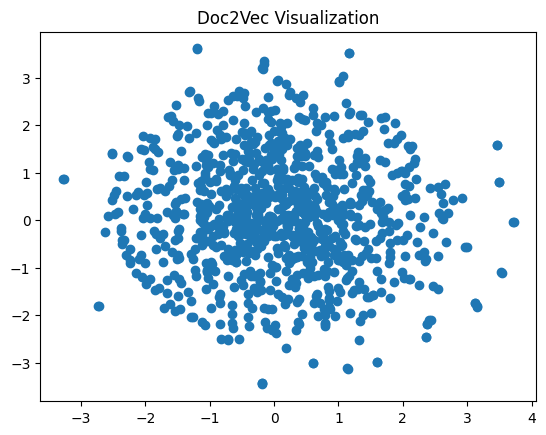

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Use t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(np.array(document_vectors))

# Plot the 2D vectors
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
plt.title('Doc2Vec Visualization')
plt.show()

## Save model

In [16]:
model.save('/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/model/dbow.h5')

In [17]:
model1 = Doc2Vec.load('/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/model/dbow.h5')

document_vector = model1.infer_vector(X_test[0].split(' '))

print("Document :", X_test[0])
print("Vector:", document_vector)

Document : thủ_tướng người_dân thụ_hưởng kết_quả chuyển_đổi thủ_tướng chỉ_đạo tttt kiểm_tra tinh_thần người_dân thụ_hưởng kết_quả chuyển_đổi sốsáng thủ_tướng chủ_trì hội_nghị trực_tuyến toàn_quốc phiên họp uỷ_ban quốc_gia tổ công_tác triển_khai đề_án chính_phủ phát_triển ứng_dụng dữ_liệu dân_cư định_danh xác_thực điện_tử phục_vụ chuyển_đổi quốc_gia giai_đoạn tầm kết_luận hội_nghị thủ_tướng quy_định sổ_hộ_khẩu giấy sổ tạm_trú giấy bất_cập thuận_lợi người_dân người_dân phản_ánh vướng_mắc thủ_tục hành_chính thủ_tướng triển_khai biện_pháp phát_sinh thủ_tướng chỉ_đạo thông_tin truyền_thông kiểm_tra địa_phương vào_cuộc chủ_tịch ubnd tỉnh thành_phố tinh_thần người_dân thụ_hưởng kết_quả người_dân thất_vọng chuyển_đổi thủ_tướng quy_định sổ_hộ_khẩu giấy sổ tạm_trú giấy bất_cập ảnh vgpnhật bắc thủ_tướng nhấn_mạnh chuyển_đổi quyết_tâm quyết_liệt đổi_mới sáng_tạo lãnh_đạo chỉ_đạo điều_hành hệ_thống hành_lang_pháp_lý hoàn_chỉnh thuận_lợi đòi_hỏi điều_chỉnh kịp_thời tình_hình nguồn_lực nguồn_lực nhà_

# DM

## Prepare data

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
%cp '/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/Data/data_clean_5_class.pkl' '/content'

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', 200)

data = pd.read_pickle('/content/data_clean_5_class.pkl')
data = data[data['Label'] != 'Undetermined']
data

,Title,Content,Label
0,"SAU BẮT CÓC, ĐẾN TRỤC XUẤT (Hà Minh Thảo)",đừng chánh_trị_gia giàu hứa nhân_đạo ký thương_ước quốc_gia tôn_trọng nhân_quyền đồng_bào trường_hợp nguyễn_quang hồng nhân trịnh thuý hạnh nhà_nước cộng_hoà liên_bang đức bắt chở giao công_an việ...,False
1,DÂM TẶC VIỆN PHÓ LÀ ĐẦU SAI CỦA VŨ NHÔM (tổng hợp),ta tràn_ngập báo mạng gọi ta hình ta buồn_nôn quyền_thế dâm tặc hưu đi địa_phương ngang_nhiên trò dâm_ô đồi_bại trẻ_em tưởng_tượng đương_chức ta trò đồi_bại ta làm_việc sinh_sống xảy đương_chức dá...,False
2,NĂM KỶ HỢI : CẦN DUNG DƯỠNG SỰ TỰ CHỦ CỦA DÂN TỘC (Nguyễn Hiền - VNTB),v việt_nam chính_thức kỷ hợi âm_lịch việt ngô tiên_vương đánh_đuổi tan giặc nam hán nhà_nước việt_nam độc_lập chủ độc_lập tự_chủ xưng_vương kinh_đô cổ loa phong châu đông_anh hà_nội nhà_nghiên_cứu...,False
3,Lật Chiến Thư chỉ thị cho Nguyễn Thị Kim Ngân về cam kết “Vành đai và Con đường”,ngân chân_thành bày_tỏ xu_nịnh hoàng_đế tập sắp_xếp kim_ngân leo tân_thái_thú hồn hoa xác việt tương_lai câu kinh_kệ quen_thuộc kế_thừa gìn_giữ vun_đắp tài_sản quan_hệ hai lật chiến thư gián_tiếp ...,False
4,Màu Cờ: Linh hồn của Tổ Quốc,bảo giang tự_do nhân_phẩm nhân_quyền công_dân luật_pháp bảo_vệ tôn_trọng công_dân coi tội tuyên_án bạo_hành cơ_quan trách_nhiệm xã_hội nhân_bản tiếng súng đùng chát phá làng phá xóm cờ_đỏ đêm khuy...,False
...,...,...,...
796,\nTiết lộ chấn động: Tướng CA Phạm Quý Ngọ đã mật báo để Dương Chí Dũng trốn thoát \n,nan,True
797,Hơn 50 công ty ra thông cáo dời nhà máy khỏi Trung Quốc do ảnh hưởng của cuộc chiến thương mại,cuộc_chiến thương_mại mỹ trung_quốc kéo_dài thuế áp hàng_hoá xuất_xứ trung_quốc trị_giá tỷ đô_la mỹ tổng_thống mỹ donald trump đe_doạ trung_quốc đòn phản_công áp_thuế hàng_hoá trung_quốc trị_giá t...,True
798,Điều gì đã xảy ra trong 3 giờ chiếm đóng gây rung chuyển Hồng Kông?,tối_ngày biểu_tình hồng_kông phá vỡ rào_cản ngăn_cách xông khu liên đồng lập_pháp thành_phố kính lót đập vỡ chiều biểu_tình phá thủng cửa_chớp kim_loại lối công_cộng cạnh khu_vực biểu_tình biệt_da...,True
799,NHÀ GIÀU & CƯỚP (Phùng Đức Tùng),chuyến đi nam_phi câu tài thuê suốt hành_trình tóc xoăn da đen_nháy đôi mắt to nổi_bật khuôn_mặt thường_xuyên cúi nghèo xứ khổ lắm giải_thích chế_độ nô_lệ xoá_bỏ nam_phi da đen giải_phóng tự_do co...,True


In [ ]:
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)
data_shuffled

,Title,Content,Label
0,Nội bộ Đảng CSVN phân hóa về chủ trương đối với Trung Quốc,trích_đoạn asia times việt_nam hướng khủng_hoảng lãnh_đạo kế_vị tác_giả david huttđảng cầm_quyền csvn phân_chia chủ_trương ủng_hộ chống trung_quốc thềm đại_hội đảng then_chốt vốn quyết_định đường_...,False
1,MÓN QUÀ CỦA TRUMP DÀNH CHO TALIBAN (tổng hợp),tấn_công hoa_kỳ xâm_lược afghanistan lật_đổ chế_độ taliban phá_huỷ mạng_lưới khủng_bố quốc_tế chủ_chốt mỹ mệt_mỏi chiến_tranh vị tổng_thống thoát mớ bòng_bong thoả_thuận dự_kiến đáp_ứng yêu_sách t...,True-w-false
2,Bộ trưởng Công Thương,bộ_trưởng công_thương trách_nhiệm toàn_diện chính_phủ công_tác điều_hành thị_trường xăng_dầu cung_cấp xăng_dầu thiếu_hụt đứt_gãy tình huốngcông điện gửi bộ_trưởng nêu thị_trường xăng_dầu hiện_tượn...,True
3,1 triệu tỷ đồng gửi ngân hàng: Xót xa nhưng còn hơn chi tiêu lãng phí,đại_biểu trần văn_lâm tiền đầu_tư công triệu tỷ đồng giải_ngân lãng_phí xót tiền két tiêu đượcsáng trao_đổi báo_chí hành_lang quốc_hội đại_biểu trần văn_lâm uỷ_ban tài_chính ngân_sách phân_tích ng...,True
4,Thứ trưởng Phạm Anh Tuấn được giới thiệu bầu làm Chủ tịch tỉnh Bình Định,thứ_trưởng tttt phạm anh_tuấn ban_bí_thư chỉ_định tham_gia ban_chấp_hành ban thường_vụ chức_vụ phó bí_thư tỉnh_uỷ giới_thiệu bầu chủ_tịch tỉnh bình địnhtrước ban_bí_thư điều_động chỉ_định phạm anh...,True
...,...,...,...
723,"Đúng là “nghị gật”, và “nhàn cư vi bất thiện""",ngàn hương kỳ họp qh màu_sắc chợ_chiều nghị_trường màu sức chợ_chiều phát_biểu ngài đa_số ra_sức nịnh thối ngượng_mồm đề ý_tưởng hết_sức chú_ý đám nịnh thối phát_biểu đb nguyễn_anh trí văn_hoá nịn...,False
724,Ung thư chính trị,thảo_luận diễn_đàn quốc_hội chiều mười văn_kiện đại_hội đại_biểu lưu bình nhưỡng phát_biểu thẳng_thắn trường_hợp ung_thư mặt trịphát biểu nhưỡng căn_cứ diễn suy_thoái xuống_cấp phẩm_chất chính_trị...,False-w-true
725,Chỉ định Bí thư Lạng Sơn,phó cn ub kiểm_tra tư trần_sỹ chỉ_định chức_vụ bí_thư lạng_sơn đại_hội đảng_bộ tỉnh bầu bí thưdo đại_hội đảng_bộ tỉnh lạng_sơn bầu bí_thư trần_sỹ phó chủ_nhiệm ub kiểm_tra tư chỉ_định chức_vụ bí_t...,True
726,\nMỗi người Việt Nam gánh hơn 900 đô la nợ công \n,ảnh minh_hoạ afp trung_bình người_dân việt_nam gánh đô_la nợ công tổng_số nợ tỷ đô_la chiếm gdp đồng_hồ nợ công toàn_cầu the economist hôm_nay con_số năm_ngoái tổng nợ việt_nam gấp nợ công xuất_bả...,False-w-true


In [ ]:
sentences = list(data_shuffled['Content'])
labels = list(data_shuffled['Label'])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)

In [ ]:
X_train[0]

'việt_nam trải giai_đoạn lối_thoát sụp_đổ kinh_tế biến dạng xã_hội đi dần hỗn_loạn hoàn_cảnh ngặt_nghèo cộng_sản cầm_quyền vất_vả chiến_tranh láng_giềng kịp ý_nghĩa câu đổi_mới chết chết báo trướccsvn buộc chấp_nhận từ_bỏ đường kinh_tế chỉ_huy thời_kỳ đổi_mới kinh_tế tức đại_hội_đảng_lần_thứ vi áp_dụng kinh_tế_thị_trường lưu_luyến chủ_nghĩa_cộng_sản thể_chế chính_trị mô_tả từ_ngữ lôi_kéo định hường xã_hội_chủ_nghĩa tồn_tại naynăm tiêu_chuẩn ngân_hàng thế_giới wb quốc_gia thu_nhập bình_quân đầu mỹ_kim quốc_gia nghèo con_số tổng_cục thống_kê việt_nam người_dân việt_nam thu_nhập bình_quân mỹ_kim nghĩa_việt_nam thoát danh_sách quốc_gia nghèo_đói sân_chơi kinh_tế_thị_trường việt_nam nghèo_đói chậmthế thập_kỷ hội_nhập lợi_thế quốc_gia tiềm_năng phát_triển việt_nam viện_trợ hào_hiệp vốn vay_lãi suất tỷ mỹ_kim định_chế tài_chính quốc_tế kết_quả tương_xứng nợ công việt_nam quốc_gia phát_triển đùa chuyên_gia kinh_tế sự_thật mỉa_mai chối cãicũng ngân_hàng thế_giới thu_nhập mỹ_kim thu_nhập trung_b

In [ ]:
y_train[0]

'False'

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# preproces the documents, and create TaggedDocuments
tagged_data = [TaggedDocument(words=doc.split(' '), tags=[str(i)]) for i, doc in enumerate(X_train)]

## Create model and train

In [ ]:
#doc2vec parameters
vector_size = 300 # word vector size
window_size = 15 # context window size
min_count = 1 # minimum frequency threshold for word types
train_epoch = 100
dm = 1 #0 = dbow; 1 = dmpv

In [ ]:
# train the Doc2vec model
# model = Doc2Vec(tagged_data, vector_size=vector_size, window=window_size, min_count=min_count, dm=dm, dbow_words=1, epochs=train_epoch, workers=5)

In [ ]:
model = Doc2Vec(vector_size=vector_size, window=window_size, min_count=min_count, dm=dm, epochs=train_epoch)

model.build_vocab(tagged_data)
model.train(tagged_data,
            total_examples=model.corpus_count,
            epochs=model.epochs)

## Result

In [ ]:
# get the document vectors
document_vectors = [model.infer_vector(doc.split(' ')) for doc in X_train]

#  print the document vectors
for i, doc in enumerate(X_train[:1]):
    print("Document", i+1, ":", doc)
    print("Vector:", document_vectors[i])
    print()

Document 1 : việt_nam trải giai_đoạn lối_thoát sụp_đổ kinh_tế biến dạng xã_hội đi dần hỗn_loạn hoàn_cảnh ngặt_nghèo cộng_sản cầm_quyền vất_vả chiến_tranh láng_giềng kịp ý_nghĩa câu đổi_mới chết chết báo trướccsvn buộc chấp_nhận từ_bỏ đường kinh_tế chỉ_huy thời_kỳ đổi_mới kinh_tế tức đại_hội_đảng_lần_thứ vi áp_dụng kinh_tế_thị_trường lưu_luyến chủ_nghĩa_cộng_sản thể_chế chính_trị mô_tả từ_ngữ lôi_kéo định hường xã_hội_chủ_nghĩa tồn_tại naynăm tiêu_chuẩn ngân_hàng thế_giới wb quốc_gia thu_nhập bình_quân đầu mỹ_kim quốc_gia nghèo con_số tổng_cục thống_kê việt_nam người_dân việt_nam thu_nhập bình_quân mỹ_kim nghĩa_việt_nam thoát danh_sách quốc_gia nghèo_đói sân_chơi kinh_tế_thị_trường việt_nam nghèo_đói chậmthế thập_kỷ hội_nhập lợi_thế quốc_gia tiềm_năng phát_triển việt_nam viện_trợ hào_hiệp vốn vay_lãi suất tỷ mỹ_kim định_chế tài_chính quốc_tế kết_quả tương_xứng nợ công việt_nam quốc_gia phát_triển đùa chuyên_gia kinh_tế sự_thật mỉa_mai chối cãicũng ngân_hàng thế_giới thu_nhập mỹ_kim thu_

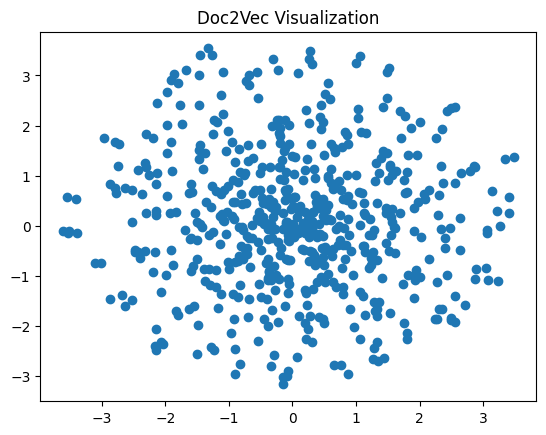

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Use t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(np.array(document_vectors))

# Plot the 2D vectors
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
plt.title('Doc2Vec Visualization')
plt.show()

## Save model

In [ ]:
model.save('/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/model/dm.h5')

In [ ]:
model1 = Doc2Vec.load('/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/model/dm.h5')

document_vector = model1.infer_vector(X_test[0].split(' '))

print("Document :", X_test[0])
print("Vector:", document_vector)

Document : ô_nhiễm không_khí đề_cập dường_như mức_độ người_dân nguy_hại ô_nhiễm bụi mịn nhà_khoa_học định_nghĩa bụi mịn hạt bụi trôi_nổi không_khí kích_thước mật_độ micromet bụi đường_kính μm gọi bụi mịn nguy_hiểm bụi siêu mịn pm xâm_nhập tế_bào cơ_thể phá_huỷ cơ_chế bảo_vệ miễn_dịch tế_bào loạt bệnh cấp_tính bụi mịn hại cơ_quan tim phổi não bụi siêu mịn không_khí coi tác_nhân ung_thư cấp_độ việt_nam số_lượng nhà_máy nhiệt_điện trải bắc chí nam môi_trường lo_ngại tro xỉ nhà_máy nhiệt_điện thải nguyên_nhân chất_lượng không_khí đi hàng chục ngàn người_dân tuy_phong biểu_tình phản_đối nhà_máy nhiệt_điện vĩnh tân_xả khói thải ô_nhiễm nghiêm_trọng lắng hàng chục bắt kết_tội gây_rối trật_tự công_cộng nhà_máy ô_nhiễm quảng_ninh hải_phòng hải_dương nam_định nghệ_an hà_tĩnh quảng_bình long_an sóc_trăng trà_vinh nhà_máy nhiệt_điện than mọc lộ_trình thái_bình bộ_trưởng công_thương trần tuấn giải_pháp cứu dự_án tỉ đồng đắp chiếu suốt tiên_tiến đức thuỵ_điển dừng cấm công_nghệ nhiệt_điện than bảo_v